In [1]:
#external libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as clt
import plotly
import plotly.subplots as sb
import plotly.express as px
import plotly.graph_objects as go
import dotenv
import pandas as pd
import scipy.fft as fft
import scipy.signal as sg
import scipy.io as sio
import pickle as pkl
import xgboost as xgb
import time

#project library
from spinco import *

#environment variables
dotenv.load_dotenv('lab.env')

#project variables
datapath=os.environ['DATAPATH']
cognipath=datapath+"\\COGNITION"
dreamspath=datapath+"\\DREAMS"
masspath=datapath+"\\MASS"


## load mass

In [2]:
annotations, signalsMetadata = loadMASSSpindles(masspath)

In [3]:
annotations.head()

,type,expert,subjectId,labelerId,startTime,duration,samplerate,stopTime,startInd,stopInd
0,kcomplex,E1,0001,0001,830.596676,0.699174,256,831.295850,212633,212812
1,kcomplex,E1,0001,0001,840.981316,0.492156,256,841.473472,215291,215417
2,kcomplex,E1,0001,0001,970.596678,0.578088,256,971.174766,248473,248621
3,kcomplex,E1,0001,0001,1049.772807,0.695268,256,1050.468075,268742,268920
4,kcomplex,E1,0001,0001,1077.231575,0.648396,256,1077.879971,275771,275937


In [4]:
signalsMetadata.head()

,subjectId,file,channel,duration,samplerate,isOriginalSamplerate,database
0,0001,MASS_0001.pkl,C3-CLE,28956.0,256,True,MASS
1,0002,MASS_0002.pkl,C3-CLE,35016.0,256,True,MASS
2,0003,MASS_0003.pkl,C3-CLE,36760.0,256,True,MASS
3,0004,MASS_0004.pkl,C3-CLE,28004.0,256,True,MASS
4,0005,MASS_0005.pkl,C3-CLE,31244.0,256,True,MASS


## spindle duration histograms

In [5]:
spindles=annotations[annotations.type=='spindle'].copy()

In [7]:
len(spindles)

33458

In [6]:
#spindles longer than 4 seconds
print(len(spindles[spindles.duration>4])/len(spindles)) #50 parts per million
spindles[spindles.duration>4]

0.00059776436128878


,type,expert,subjectId,labelerId,startTime,duration,samplerate,stopTime,startInd,stopInd
13306,spindle,E2,0006,0002,18638.329295,20.764296,256,18659.093591,4771412,4776728
19469,spindle,E2,0009,0002,2202.741728,5.757444,256,2208.499172,563902,565376
19511,spindle,E2,0009,0002,2502.929749,4.601268,256,2507.531017,640750,641928
20068,spindle,E2,0009,0002,10321.519079,10.413396,256,10331.932475,2642309,2644975
21090,spindle,E2,0009,0002,27080.863731,14.018634,256,27094.882365,6932701,6936290
29628,spindle,E2,0012,0002,16846.926775,4.804380,256,16851.731155,4312813,4314043
29902,spindle,E2,0012,0002,24721.796353,4.359096,256,24726.155449,6328780,6329896
31303,spindle,E2,0013,0002,7311.729964,4.363002,256,7316.092966,1871803,1872920
31360,spindle,E2,0013,0002,7845.733229,7.210476,256,7852.943705,2008508,2010354
31711,spindle,E2,0013,0002,13991.667756,8.811936,256,14000.479692,3581867,3584123


In [71]:
aux=annotations[["type","expert","subjectId"]].groupby(["type","expert","subjectId"],as_index=False).size()
px.bar(aux,x="subjectId",y="size",color="expert",barmode="group",facet_row="type",title="MASS SS2 annotations overview")

In [72]:
px.histogram(spindles,x='duration',title="MASS SS2 spindle duration histogram")

In [73]:
px.histogram(spindles,x='duration',facet_row="expert",title="MASS SS2 spindle duration histogram by expert")

In [74]:
px.histogram(spindles,x='duration',color="subjectId",facet_row="expert",title="MASS SS2 spindle duration histogram by expert and signal")

In [75]:
aux=spindles[['subjectId','startTime']].groupby('subjectId',as_index=False).size()
aux

,subjectId,size
0,0001,3496
1,0002,3355
2,0003,745
3,0004,253
4,0005,1542
5,0006,990
6,0007,2519
7,0008,385
8,0009,2484
9,0010,2734


In [76]:
aux=pd.merge(signalsMetadata,aux,on="subjectId")
aux["density"]=aux["size"]/(aux["duration"]/3600)

In [77]:
aux["density"]

0     434.645669
1     344.928033
2      72.959739
3      32.523925
4     177.672513
5     122.938944
6     320.415518
7      51.627803
8     299.738553
9     379.575781
10    303.892427
11    218.420552
12    211.415374
13    297.827939
14     11.994230
15     57.417078
16    211.107191
17    346.430263
18    187.284025
Name: density, dtype: float64

In [78]:
np.mean(aux["density"])

214.88502943326029

In [79]:
np.std(aux["density"])

125.53534960394505

In [80]:
px.histogram(aux['size'][aux['size']>500],nbins=6)

In [81]:
m=np.mean(aux['size'])
s=np.std(aux['size'])

In [82]:
(1542>(m-s))and(1542<(m+s))

True

In [83]:
m-1.25*s

481.9926866951573

In [84]:
aux['is1.5sigma']=aux.apply(
    lambda row: (row['size']>(m-0.75*s))and(row['size']<(m+0.75*s)),
    axis=1)
aux['is2sigma']=aux.apply(
    lambda row: (row['size']>(m-s))and(row['size']<(m+s)),
    axis=1)
aux['is5/2sigma']=aux.apply(
    lambda row: (row['size']>(m-1.25*s))and(row['size']<(m+1.25*s)),
    axis=1)
aux['is3sigma']=aux.apply(
    lambda row: (row['size']>(m-1.5*s))and(row['size']<(m+1.5*s)),
    axis=1)
aux

,subjectId,file,channel,duration,samplerate,isOriginalSamplerate,database,size,density,is1.5sigma,is2sigma,is5/2sigma,is3sigma
0,0001,MASS_0001.pkl,C3-CLE,28956.0,256,True,MASS,3496,434.645669,False,False,False,False
1,0002,MASS_0002.pkl,C3-CLE,35016.0,256,True,MASS,3355,344.928033,False,False,False,False
2,0003,MASS_0003.pkl,C3-CLE,36760.0,256,True,MASS,745,72.959739,False,True,True,True
3,0004,MASS_0004.pkl,C3-CLE,28004.0,256,True,MASS,253,32.523925,False,False,False,True
4,0005,MASS_0005.pkl,C3-CLE,31244.0,256,True,MASS,1542,177.672513,True,True,True,True
5,0006,MASS_0006.pkl,C3-CLE,28990.0,256,True,MASS,990,122.938944,False,True,True,True
6,0007,MASS_0007.pkl,C3-CLE,28302.0,256,True,MASS,2519,320.415518,True,True,True,True
7,0008,MASS_0008.pkl,C3-CLE,26846.0,256,True,MASS,385,51.627803,False,False,False,True
8,0009,MASS_0009.pkl,C3-CLE,29834.0,256,True,MASS,2484,299.738553,True,True,True,True
9,0010,MASS_0010.pkl,C3-CLE,25930.0,256,True,MASS,2734,379.575781,False,True,True,True


In [85]:
spindles[['labelerId','subjectId','duration']].groupby(['labelerId']).describe()

duration                                                             \
             count      mean       std       min       25%      50%       75%   
labelerId                                                                       
0001       11204.0  0.840652  0.206918  0.335915  0.699173  0.80854  0.941353   
0002       22254.0  1.203908  0.589257  0.117180  0.773388  1.11321  1.515528   

                      
                 max  
labelerId             
0001        2.218605  
0002       20.764296

## criterium to remove outliers

In [86]:
#keep around 99% of annotations
len(spindles)*0.01

334.58

In [87]:
len(spindles)*0.01/2

167.29

In [88]:
minDuration=0.3
maxDuration=2.9

In [89]:
len(spindles[spindles.duration>maxDuration])

196

In [90]:
len(spindles[spindles.duration<minDuration])

182

In [91]:
(len(spindles[spindles.duration>maxDuration])+len(spindles[spindles.duration<minDuration]))/len(spindles)

0.011297746428357942

In [92]:
1-(len(spindles[spindles.duration>maxDuration])+len(spindles[spindles.duration<minDuration]))/len(spindles)

0.9887022535716421

In [93]:
spindles['overMax']=spindles.duration>maxDuration
spindles['underMin']=spindles.duration<minDuration
spindles['discard']=spindles.overMax|spindles.underMin
spindles['keep']=(spindles.duration>minDuration)&(spindles.duration<maxDuration)
spindles

,type,expert,subjectId,labelerId,startTime,duration,samplerate,stopTime,startInd,stopInd,overMax,underMin,discard,keep
409,spindle,E1,0001,0001,888.327805,0.640579,256,888.968384,227412,227576,False,False,False,True
410,spindle,E1,0001,0001,905.758061,0.578094,256,906.336155,231874,232022,False,False,False,True
411,spindle,E1,0001,0001,917.731574,0.847603,256,918.579177,234939,235156,False,False,False,True
412,spindle,E1,0001,0001,922.078189,0.878845,256,922.957034,236052,236277,False,False,False,True
413,spindle,E1,0001,0001,939.055445,0.757767,256,939.813212,240398,240592,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45035,spindle,E2,0019,0002,25433.134130,0.800730,256,25433.934860,6510882,6511087,False,False,False,True
45036,spindle,E2,0019,0002,25437.911168,0.472626,256,25438.383794,6512105,6512226,False,False,False,True
45037,spindle,E2,0019,0002,25443.578774,1.035090,256,25444.613864,6513556,6513821,False,False,False,True
45038,spindle,E2,0019,0002,25456.630907,0.890568,256,25457.521475,6516898,6517125,False,False,False,True


In [94]:
spindles[spindles.discard].groupby(['subjectId','expert']).describe()

startTime                                          \
                     count          mean          std          min   
subjectId expert                                                     
0001      E2          22.0  16098.685094  8641.962551   836.894437   
0002      E2          15.0  13418.490055  9730.926965   527.886691   
0003      E2           7.0  13665.721928  5038.506856  7714.587258   
0005      E2          15.0  14396.503424  9176.033375  3097.904434   
0006      E2          17.0  16517.982246  7071.423389  1068.967911   
0007      E2          36.0  15922.295152  8099.307260  2284.380543   
0009      E2          30.0  15708.320216  8687.632236  1910.776835   
0010      E2          19.0  11549.626527  7873.071793   433.902685   
0011      E2          31.0  13019.331841  7197.234543   963.714674   
0012      E2          40.0  16400.301974  8567.719585  1153.092932   
0013      E2          68.0  19439.880038  8259.105219  2405.018844   
0014      E2          33.0  13330.907992  8016.828958  1786.370717   
0017      E2           9.0  17125.285873  8469.063372   645.770501   
0018      E2          27.0  14461.325039  8652.597163  1183.927345   
0019      E2           9.0  16956.430130  5475.084221  8622.455547   

                                                                          \
                           25%           50%           75%           max   
subjectId expert                                                           
0001      E2      12219.323572  17581.626417  23798.774264  27807.316802   
0002      E2       7227.143271  10157.768750  20597.998917  29838.457689   
0003      E2      10887.470419  13314.736234  14669.943101  23515.902968   
0005      E2       3719.731150  18896.141936  21414.818606  28042.408189   
0006      E2      15600.709387  17121.269002  18638.329295  25653.426512   
0007      E2       9700.359493  16286.150234  23896.415785  27743.859838   
0009      E2       9535.117248  16962.108849  22921.117813  27080.863731   
0010      E2       4914.808302  11806.254450  17513.989285  24140.044888   
0011      E2       5938.992845  13462.296058  17679.263148  23896.176746   
0012      E2       9324.939890  16228.342163  23140.212796  29382.844908   
0013      E2      13158.056573  18669.768832  28922.026576  32883.238645   
0014      E2       6285.889625  14927.938314  19170.889365  26503.726383   
0017      E2      13959.299976  17480.078025  24462.677707  25260.552003   
0018      E2       7312.357562  13969.908622  18743.087343  28446.219603   
0019      E2      12636.894654  18025.610303  22299.132618  23192.270593   

                 duration            ...    startInd            stopInd  \
                    count      mean  ...         75%        max   count   
subjectId expert                     ...                                  
0001      E2         22.0  1.585658  ...  6092486.25  7118673.0    22.0   
0002      E2         15.0  1.405639  ...  5273088.00  7638645.0    15.0   
0003      E2          7.0  0.265050  ...  3755505.50  6020071.0     7.0   
0005      E2         15.0  0.257796  ...  5482193.50  7178856.0    15.0   
0006      E2         17.0  1.626045  ...  4771412.00  6567277.0    17.0   
0007      E2         36.0  2.122368  ...  6117482.25  7102428.0    36.0   
0009      E2         30.0  2.538770  ...  5867806.50  6932701.0    30.0   
0010      E2         19.0  1.308510  ...  4483581.50  6179851.0    19.0   
0011      E2         31.0  1.504944  ...  4525891.50  6117421.0    31.0   
0012      E2         40.0  2.170564  ...  5923894.75  7522008.0    40.0   
0013      E2         68.0  3.333369  ...  7404039.00  8418109.0    68.0   
0014      E2         33.0  2.375913  ...  4907748.00  6784954.0    33.0   
0017      E2          9.0  1.965586  ...  6262445.00  6466701.0     9.0   
0018      E2         27.0  0.477689  ...  4798230.50  7282232.0    27.0   
0019      E2          9.0  0.590240  ...  5708578.00  5937221.0     9.0   

                                    

In [95]:
spindles[spindles.keep][['subjectId','expert','duration']].groupby(['subjectId','expert']).describe()

duration                                                    \
                    count      mean       std       min       25%       50%   
subjectId expert                                                              
0001      E1       1044.0  0.822037  0.202792  0.390602  0.675735  0.796822   
          E2       2430.0  1.182772  0.482949  0.316386  0.828072  1.128834   
0002      E1       1143.0  0.834582  0.195713  0.414040  0.699173  0.816353   
          E2       2197.0  1.218885  0.464270  0.320292  0.859320  1.187424   
0003      E1        143.0  0.690269  0.149652  0.460907  0.585900  0.648399   
          E2        595.0  0.968905  0.389112  0.320292  0.691362  0.894474   
0004      E1        253.0  0.829708  0.224842  0.492157  0.667923  0.785103   
0005      E1        341.0  0.706104  0.131805  0.425751  0.613243  0.699173   
          E2       1186.0  0.924721  0.364111  0.320292  0.652302  0.867132   
0006      E1        150.0  0.761306  0.143614  0.492157  0.679642  0.749954   
          E2        823.0  0.929675  0.407874  0.320292  0.632772  0.859320   
0007      E1        912.0  0.892692  0.226504  0.425751  0.730423  0.867134   
          E2       1571.0  1.311481  0.552823  0.320292  0.890568  1.234296   
0008      E1        385.0  0.846882  0.227884  0.441376  0.695267  0.800728   
0009      E1        814.0  0.923970  0.216783  0.468719  0.773392  0.890568   
          E2       1640.0  1.309044  0.541030  0.320292  0.890568  1.246014   
0010      E1        795.0  0.815081  0.190663  0.402321  0.687454  0.773392   
          E2       1920.0  1.197211  0.506485  0.320292  0.816354  1.124928   
0011      E1        606.0  0.923982  0.222469  0.503876  0.773384  0.890564   
          E2       1510.0  1.250712  0.559568  0.320292  0.792918  1.163988   
0012      E1        709.0  0.836528  0.180787  0.437469  0.706985  0.808548   
          E2       1164.0  1.194317  0.534275  0.320292  0.769482  1.128834   
0013      E1        698.0  0.910960  0.245084  0.437477  0.742142  0.871036   
          E2       1370.0  1.475901  0.614055  0.320292  0.992124  1.425690   
0014      E1        713.0  0.805534  0.205166  0.406227  0.671829  0.773392   
          E2       1585.0  1.238628  0.582622  0.320292  0.792918  1.136646   
0015      E1         97.0  0.739281  0.106173  0.519501  0.671829  0.722610   
0016      E1        452.0  0.806943  0.210937  0.335915  0.640587  0.773384   
0017      E1        470.0  0.802766  0.155081  0.437469  0.694296  0.781200   
          E2       1183.0  1.313364  0.494659  0.324198  0.949158  1.261638   
0018      E1       1164.0  0.844465  0.185415  0.421852  0.722610  0.824165   
          E2       1653.0  0.990543  0.410848  0.324198  0.683550  0.949158   
0019      E1        315.0  0.770511  0.129903  0.453094  0.687454  0.757767   
          E2       1049.0  1.047985  0.436594  0.320292  0.714798  0.980406   

                                      
                       75%       max  
subjectId expert                      
0001      E1      0.945251  1.839722  
          E2      1.484280  2.878722  
0002      E1      0.937439  1.820198  
          E2      1.542870  2.847474  
0003      E1      0.775341  1.160080  
          E2      1.183518  2.671704  
0004      E1      0.945251  1.675674  
0005      E1      0.781197  1.195236  
          E2      1.128834  2.519370  
0006      E1      0.847603  1.480377  
          E2      1.156176  2.820132  
0007      E1      1.003845  2.042839  
          E2      1.691298  2.878722  
0008      E1      0.937439  1.925659  
0009      E1      1.027275  1.882690  
          E2      1.660050  2.878722  
0010      E1      0.921814  1.847542  
          E2      1.511622  2.894346  
0011      E1      1.042900  2.015495  
          E2      1.601460  2.878722  
0012      E1      0.956970  1.495995  
          E2      1.542870  2.874816  
0013      E1      1.026300  2.117058  
          E2      1.919799  2.878722  
0014      E1      0.906197  2.218605  
 

## Consider the sleep stages

In [96]:
samplerate=256

In [97]:
stagesAnnotations=pd.read_csv(datapath+"\MASS\stages\stages.csv")
stagesAnnotations['samplerate']=samplerate
stagesAnnotations['subjectId']=stagesAnnotations.apply(
    lambda row: str(row.subjectId).zfill(4),axis=1)
stagesAnnotations['stopTime']=stagesAnnotations.apply(
    lambda row: row.startTime+row.duration , axis=1)
stagesAnnotations['startInd']=stagesAnnotations.apply(
    lambda row: seconds2index(row.startTime,row.samplerate) , axis=1)
stagesAnnotations['stopInd']=stagesAnnotations.apply(
    lambda row: seconds2index(row.stopTime,row.samplerate) , axis=1)
stagesAnnotations.head(5)

,subjectId,type,startTime,duration,value,comment,stopTime,startInd,stopInd
0,0001,stage,560.758313,19.998720,NaN,Sleep stage ?,580.757033,143554,148674
1,0001,stage,580.758313,20.002626,NaN,Sleep stage ?,600.760939,148674,153795
2,0001,stage,600.758313,19.998720,NaN,Sleep stage ?,620.757033,153794,158914
3,0001,stage,620.758313,19.998720,NaN,Sleep stage ?,640.757033,158914,164034
4,0001,stage,640.758314,20.002626,NaN,Sleep stage ?,660.760940,164034,169155


In [98]:
spindlesFiltered=spindles[spindles.keep].reset_index(drop=True)

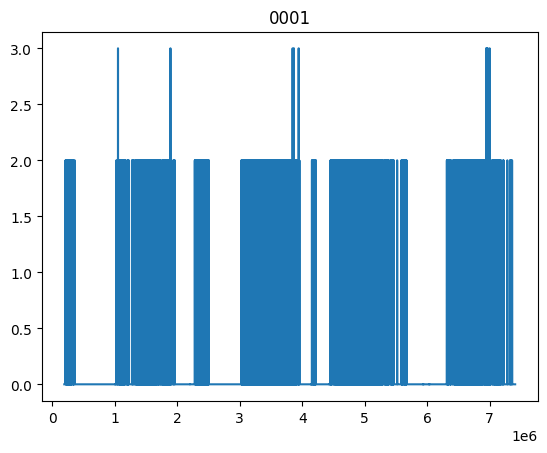

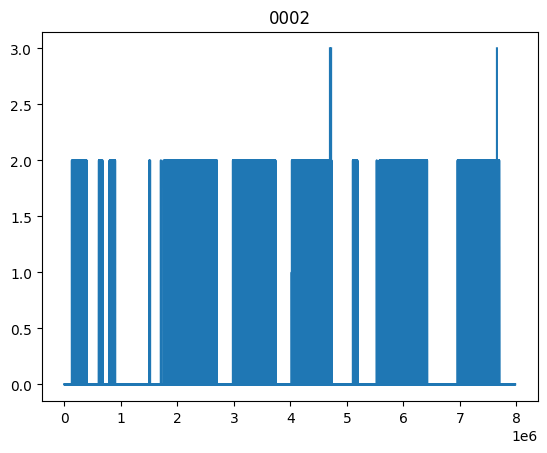

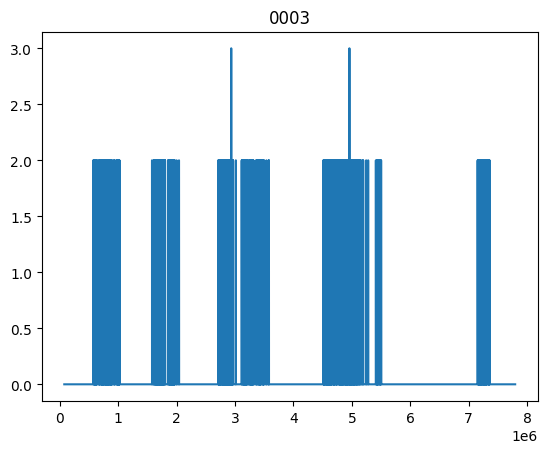

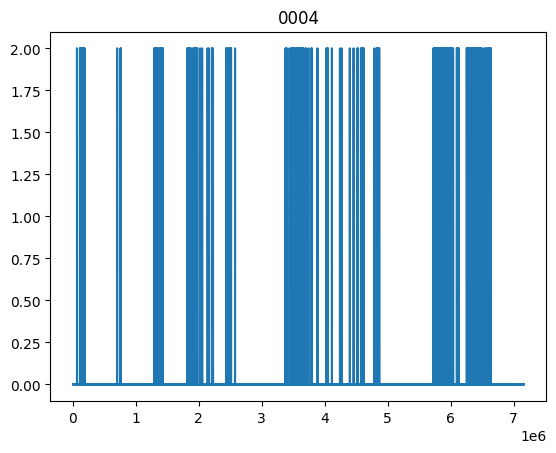

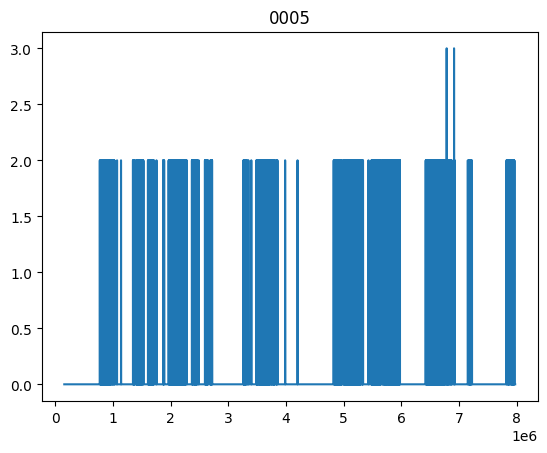

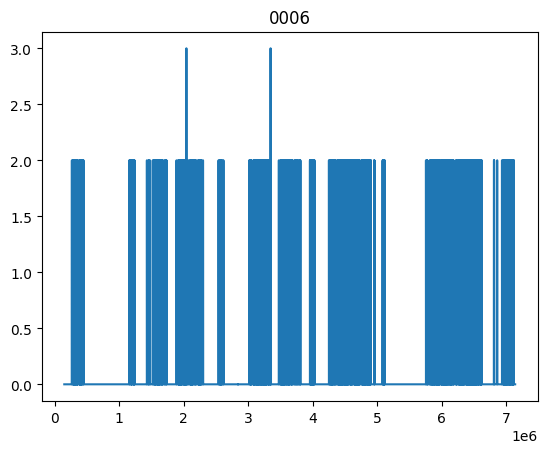

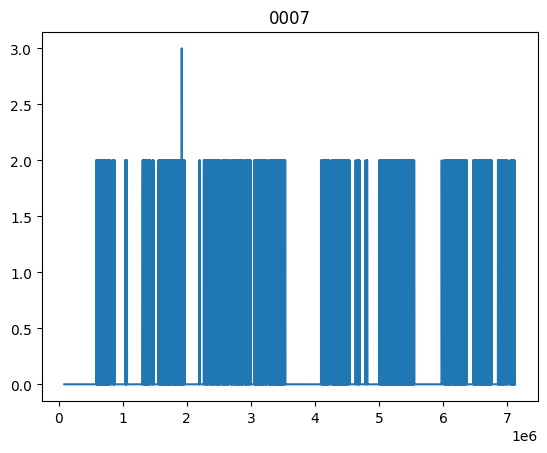

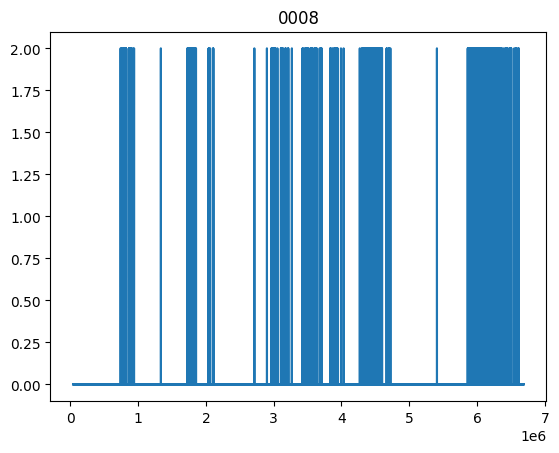

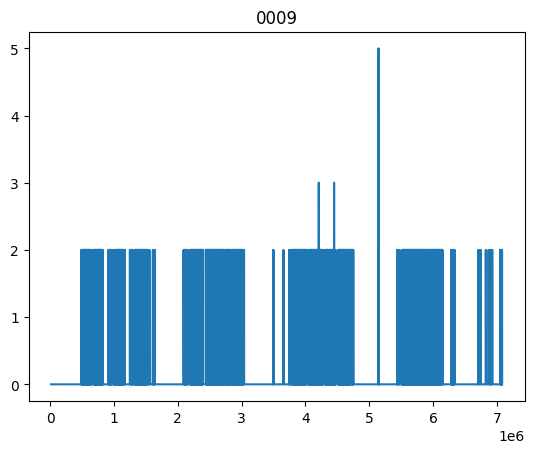

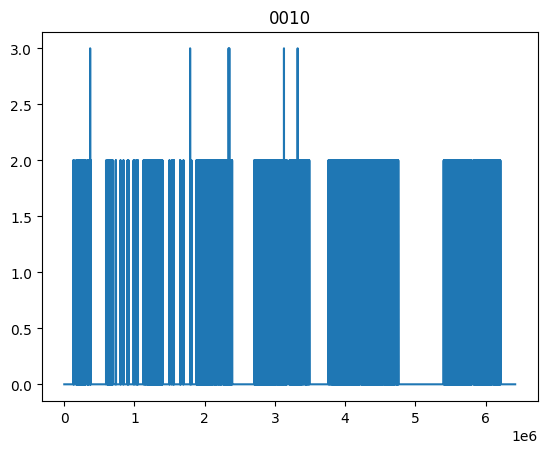

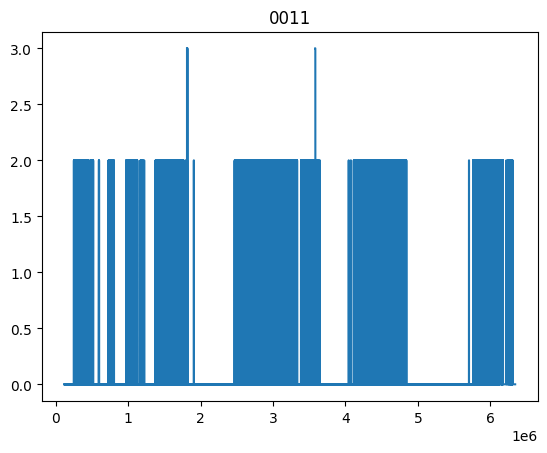

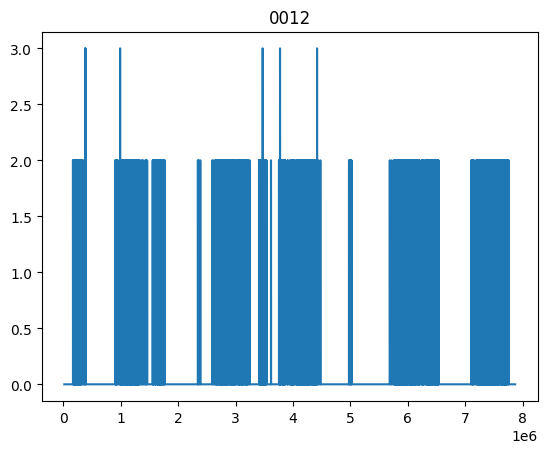

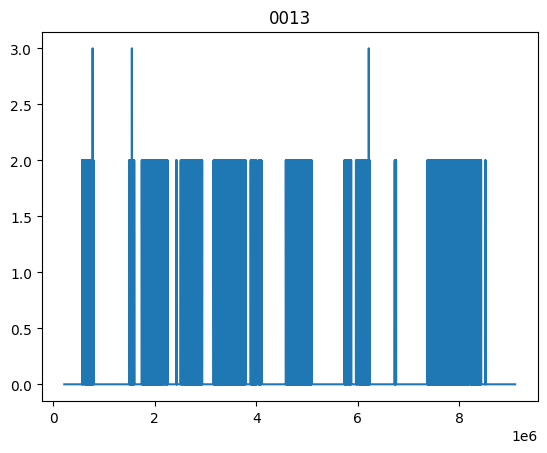

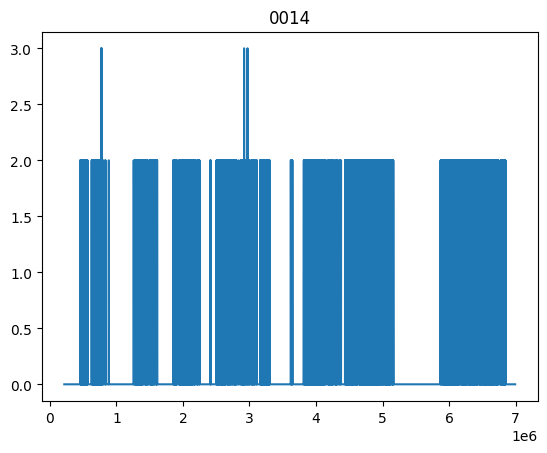

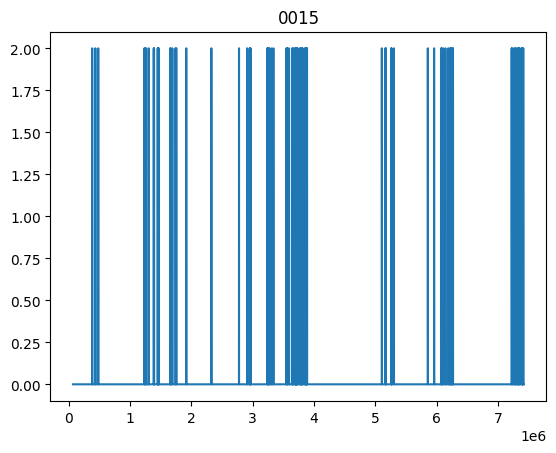

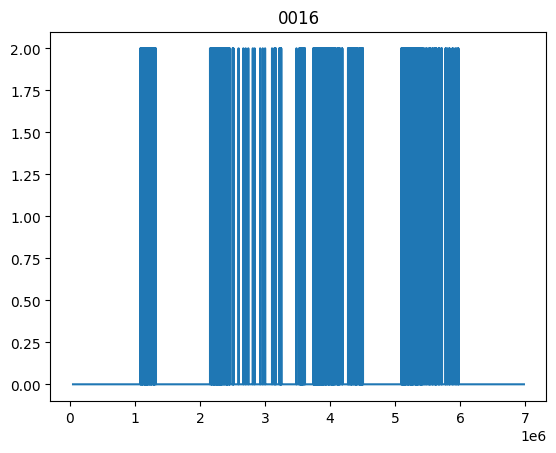

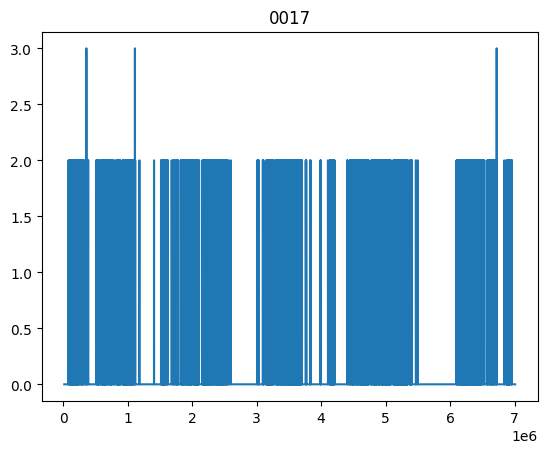

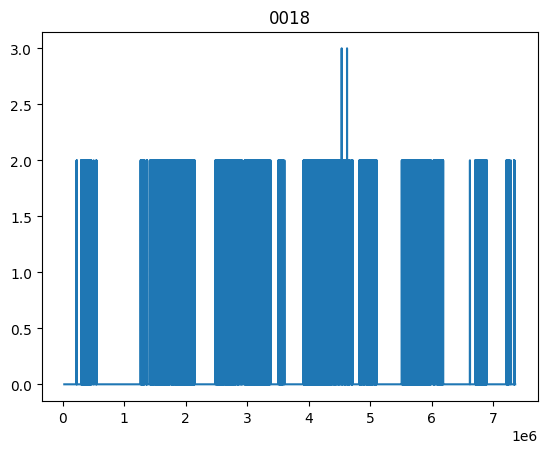

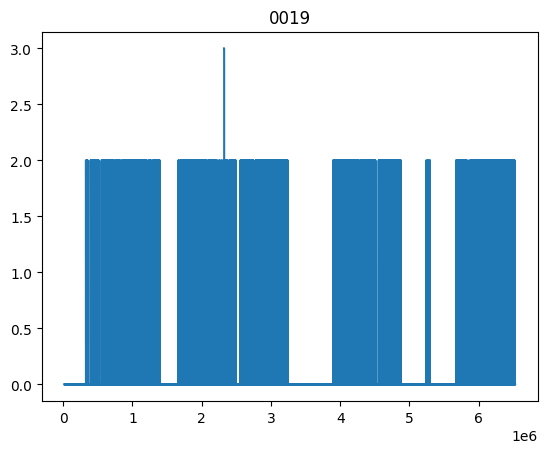

In [159]:
#visualise the stages in which spindles are marked
for ind, row in signalsMetadata.iterrows():
    subjectId=row.subjectId
    thisStages=stagesAnnotations[stagesAnnotations.subjectId==subjectId]
    excerptDimension=row.duration*row.samplerate
    subjectLabels=loadLabelsVector([subjectId],spindlesFiltered,signalsMetadata,samplerate)
    hipnogram=np.ones((int(excerptDimension),))*np.nan
    #hipnogram=np.ones((int(excerptDimension),))*2 #<- we have tried also this way in order 
    for ind_stg, row_stg in thisStages.iterrows():
        hipnogram[row_stg.startInd:row_stg.stopInd]=row_stg.value
    check=subjectLabels*hipnogram
    plt.plot(check)
    plt.title(subjectId)
    plt.show()

In [160]:
spindlesFiltered.head(5)

,type,expert,subjectId,labelerId,startTime,duration,samplerate,stopTime,startInd,stopInd,overMax,underMin,discard,keep
0,spindle,E1,0001,0001,888.327805,0.640579,256,888.968384,227412,227576,False,False,False,True
1,spindle,E1,0001,0001,905.758061,0.578094,256,906.336155,231874,232022,False,False,False,True
2,spindle,E1,0001,0001,917.731574,0.847603,256,918.579177,234939,235156,False,False,False,True
3,spindle,E1,0001,0001,922.078189,0.878845,256,922.957034,236052,236277,False,False,False,True
4,spindle,E1,0001,0001,939.055445,0.757767,256,939.813212,240398,240592,False,False,False,True


In [161]:
#extract the stages for each annotation
spindleStages={}
for ind, row in signalsMetadata.iterrows():
    subjectId=row.subjectId
    thisStages=stagesAnnotations[stagesAnnotations.subjectId==subjectId]
    excerptDimension=row.duration*row.samplerate
    thisSpindles=spindlesFiltered[spindlesFiltered.subjectId==subjectId].reset_index(drop=True)
    subjectLabels=loadLabelsVector([subjectId],spindlesFiltered,signalsMetadata,samplerate)
    hipnogram=np.zeros((int(excerptDimension),))
    for ind_stg, row_stg in thisStages.iterrows():
        hipnogram[row_stg.startInd:row_stg.stopInd]=row_stg.value
    auxStages=[]
    for ind_anno, row_anno in thisSpindles.iterrows():
        thatStages=hipnogram[row_anno.startInd:row_anno.stopInd]
        stages=np.unique(thatStages)
        auxStages.append(str(stages))
    thisSpindles['stage']=auxStages
    spindleStages[subjectId]=thisSpindles

In [162]:
spindleStages[subjectId]

,type,expert,subjectId,labelerId,startTime,duration,samplerate,stopTime,startInd,stopInd,overMax,underMin,discard,keep,stage
0,spindle,E1,0019,0001,1358.904702,0.539024,256,1359.443726,347880,348018,False,False,False,True,[2.]
1,spindle,E1,0019,0001,1564.788321,0.570274,256,1565.358595,400586,400732,False,False,False,True,[2.]
2,spindle,E1,0019,0001,1620.318579,0.871040,256,1621.189619,414802,415025,False,False,False,True,[2.]
3,spindle,E1,0019,0001,1671.039219,0.652306,256,1671.691525,427786,427953,False,False,False,True,[2.]
4,spindle,E1,0019,0001,1677.225835,0.890572,256,1678.116407,429370,429598,False,False,False,True,[2.]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,spindle,E2,0019,0002,25433.134130,0.800730,256,25433.934860,6510882,6511087,False,False,False,True,[2.]
1360,spindle,E2,0019,0002,25437.911168,0.472626,256,25438.383794,6512105,6512226,False,False,False,True,[2.]
1361,spindle,E2,0019,0002,25443.578774,1.035090,256,25444.613864,6513556,6513821,False,False,False,True,[2.]
1362,spindle,E2,0019,0002,25456.630907,0.890568,256,25457.521475,6516898,6517125,False,False,False,True,[2.]


In [173]:
np.unique(hipnogram)

array([ 0.,  1.,  2.,  3.,  5., nan])

In [166]:
#check there are no nans in the annotated regions
#nans are the parts of the signal not stage-annotated or annotated with unkown '?'
aux=np.array([])
for ind, row in signalsMetadata.iterrows():
    subjectId=row.subjectId
    aux=np.concatenate([aux,np.unique(spindleStages[subjectId].stage)])
print(np.unique(aux))

['[0. 1. 2.]' '[0. 2. 3.]' '[0. 2.]' '[1. 2.]' '[1.]' '[2. 3.]' '[2.]'
 '[3.]' '[5.]']


In [170]:
spindlesFilteredN2=pd.DataFrame()
for subjectId,subjectSpindles in spindleStages.items():
    selected=subjectSpindles[subjectSpindles.stage=='[2.]']
    spindlesFilteredN2=pd.concat([spindlesFilteredN2,selected],axis=0).reset_index(drop=True)

In [181]:
spindlesFilteredN2

,type,expert,subjectId,labelerId,startTime,duration,samplerate,stopTime,startInd,stopInd,overMax,underMin,discard,keep,stage
0,spindle,E1,0001,0001,888.327805,0.640579,256,888.968384,227412,227576,False,False,False,True,[2.]
1,spindle,E1,0001,0001,905.758061,0.578094,256,906.336155,231874,232022,False,False,False,True,[2.]
2,spindle,E1,0001,0001,917.731574,0.847603,256,918.579177,234939,235156,False,False,False,True,[2.]
3,spindle,E1,0001,0001,922.078189,0.878845,256,922.957034,236052,236277,False,False,False,True,[2.]
4,spindle,E1,0001,0001,939.055445,0.757767,256,939.813212,240398,240592,False,False,False,True,[2.]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32775,spindle,E2,0019,0002,25433.134130,0.800730,256,25433.934860,6510882,6511087,False,False,False,True,[2.]
32776,spindle,E2,0019,0002,25437.911168,0.472626,256,25438.383794,6512105,6512226,False,False,False,True,[2.]
32777,spindle,E2,0019,0002,25443.578774,1.035090,256,25444.613864,6513556,6513821,False,False,False,True,[2.]
32778,spindle,E2,0019,0002,25456.630907,0.890568,256,25457.521475,6516898,6517125,False,False,False,True,[2.]


In [175]:
annotations

,type,expert,subjectId,labelerId,startTime,duration,samplerate,stopTime,startInd,stopInd
0,kcomplex,E1,0001,0001,830.596676,0.699174,256,831.295850,212633,212812
1,kcomplex,E1,0001,0001,840.981316,0.492156,256,841.473472,215291,215417
2,kcomplex,E1,0001,0001,970.596678,0.578088,256,971.174766,248473,248621
3,kcomplex,E1,0001,0001,1049.772807,0.695268,256,1050.468075,268742,268920
4,kcomplex,E1,0001,0001,1077.231575,0.648396,256,1077.879971,275771,275937
...,...,...,...,...,...,...,...,...,...,...
45035,spindle,E2,0019,0002,25433.134130,0.800730,256,25433.934860,6510882,6511087
45036,spindle,E2,0019,0002,25437.911168,0.472626,256,25438.383794,6512105,6512226
45037,spindle,E2,0019,0002,25443.578774,1.035090,256,25444.613864,6513556,6513821
45038,spindle,E2,0019,0002,25456.630907,0.890568,256,25457.521475,6516898,6517125


In [177]:
#Now we save it:
spindlesFilteredN2[['type','expert','subjectId','labelerId','startTime','duration']].to_csv(masspath+"/annotations/spindlesFiltered.csv",index=False)

In [180]:
aux=spindlesFilteredN2[["type","expert","subjectId"]].groupby(["type","expert","subjectId"],as_index=False).size()
px.bar(aux,x="subjectId",y="size",color="expert",barmode="group",title="MASS spindles filtered overview")

## Summary

In [132]:
#we have filtered spindles shorter than 0.3 seconds...
len(spindles[spindles.duration<0.3])

182

In [133]:
#... and longer than 2.9 seconds ...
len(spindles[spindles.duration>2.9])

196

In [137]:
#... in total we discarded:
len(spindles)-len(spindlesFiltered)

378

In [135]:
#we have discarded spindles that are not labeled as only N2...
len(spindlesFiltered)-len(spindlesFilteredN2)

300

In [136]:
#... and we check that the range of the durations stays unmodifyed
print(min(spindlesFiltered.duration)==min(spindlesFilteredN2.duration))
print(max(spindlesFiltered.duration)==max(spindlesFilteredN2.duration))

True
True


In [139]:
#Duration filtering discards a bit more than 1%:
(len(spindles)-len(spindlesFiltered))/len(spindles)

0.011297746428357942

In [140]:
#Sleep stage filtering discards a bit less than 1%:
(len(spindlesFiltered)-len(spindlesFilteredN2))/len(spindles)

0.0089664654193317

In [142]:
#Overall we keep almost 98% of the spindle annotations:
len(spindlesFilteredN2)/len(spindles)

0.9797357881523103

### Same summary by subject
we know the duration filter only removes from expert E2

In [144]:
#For expert E1 we keep more than 99% of the spindle annotations:
len(spindlesFilteredN2[spindlesFilteredN2.expert=='E1'])/len(spindles[spindles.expert=='E1'])

0.993930739021778

In [145]:
#For expert E1 we keep more than 97% of the spindle annotations:
len(spindlesFilteredN2[spindlesFilteredN2.expert=='E2'])/len(spindles[spindles.expert=='E2'])

0.9725891974476498